## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

In [ ]:
null_hypothesis = "There is no difference in network latency since switching ISP."
alternative_hypothesis = "Network latency gone up since switching ISP."
true_positive = "Network latency has gone up since switching ISP, and reject null_hypothesis."
true_negative = "Network latency has NOT gone up since switching ISP and accept the null_hypothesis."
alpha = "There is no difference in network latency but we reject null_hypothesis."
beta = "There is a network latancy but we accept the null_hypothesis."

- Is the website redesign any good?
    - Are ppl using/visiting site more since redesign?

In [ ]:
null_hypothesis = "There is no difference in visit sites since redesign."
alternative_hypothesis = "The redesign is increasing site visits."
true_positive = "Site visits have increased since redesign and reject null_hypothesis."
true_negative = "Site visits haven't changed and accept null_hypothesis."
alpha = "Site visits are stagnant, reject null_hypothesis."
beta = "site visits are up, but accept null_hypothesis."

- Is our television ad driving more sales?

In [ ]:
null_hypothesis = "There is no differences in sales since launch of TV ad."
alternative_hypothesis = "TV ad has been driving up sales."
true_positive = "Sales are up, and reject null_hypothesis."
true_negative = "Sales are stagnant and accept null_hypothesis."
alpha = "Sales are stagnant, but reject null_hypothesis."
beta = "Sales are up, but accept null_hypothesis."

In [3]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# Ace Realty 
wants to determine whether the **average time it takes to sell homes is different for its two offices**. 
- A sample of **40 sales from office #1** revealed a *mean of 90 days and a standard deviation of 15 days*. 
- A sample of **50 sales from office #2** revealed a *mean of 100 days and a standard deviation of 20 days*. 

Use a .05 level of significance.

In [3]:
mean1 = 90
std1 = 15
n1 = 40

mean2 = 100
std2 = 20
n2 = 50

In [4]:
null_hypothesis = "The average time to sell a home is the same for the two offices."
alternative_hypothesis = "The average time to sell a home for the two offices is different."
confidence_level = .95
a = 1 - confidence_level 

In [6]:
t, p = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)
t, p

(-2.6252287036468456, 0.01020985244923939)

In [7]:
if p < a:
    print("We reject the null hypothesis that time to sell a home are the same")
    print("We move forward w/ the alternative hypothesis that time to sell a home is DIFFERENT.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that time to sell a home are the same
We move forward w/ the alternative hypothesis that time to sell a home is DIFFERENT.


# Load the `mpg` dataset and use it to answer the following questions:

In [4]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [9]:
mpg['avg_mileage'] = (mpg.cty + mpg.hwy) / 2

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [33]:
mpg.rename(columns={'class' : 'type'}, inplace=True)
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,type,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0


In [24]:
#car99 = mpg[(mpg.year == 1999) & (mpg.type.str.contains("suv", "pickup", "minivan"))]
car99 = mpg[(mpg.year == 1999)]
car08 = mpg[mpg.year == 2008]

<AxesSubplot:>

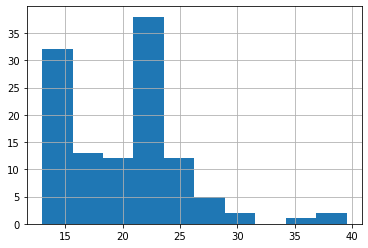

In [25]:
car99.avg_mileage.hist()

<AxesSubplot:>

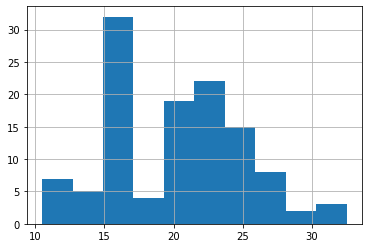

In [26]:
car08.avg_mileage.hist()

In [94]:
car99fe = car99.avg_mileage
car08fe = car08.avg_mileage

In [29]:
null_hypothesis = "The fuel efficiency is the same for the '99 & '08 vehicles."
alternative_hypothesis = "The fuel efficiency for '99 & '08 vehicles is different."
confidence_level = .95
a = 1 - confidence_level 

In [95]:
t, p = stats.ttest_ind(car99fe, car08fe)
t, p

(0.21960177245940962, 0.8263744040323578)

In [31]:
if p < a:
    print("We reject the null hypothesis that fuel efficiency is the same for the '99 & '08 vehicles.")
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that fuel efficiency for '99 & '08 vehicles is different.")

We fail to reject the null hypothesis
Not enough evidence to support the claim that fuel efficiency for '99 & '08 vehicles is different.


In [96]:
car99fe.mean(), car08fe.mean()

(20.22222222222222, 20.076923076923077)

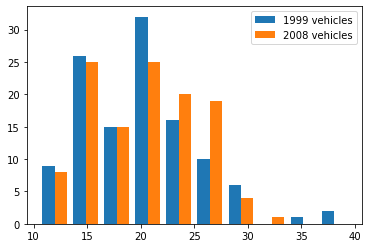

In [99]:
plt.hist([car99fe, car08fe], label=["1999 vehicles", "2008 vehicles"])
plt.legend(loc="upper right")

## Are compact cars more fuel-efficient than the average car?

In [35]:
mpg.groupby('type').mean()

,displ,year,cyl,cty,hwy,avg_mileage
type,,,,,,
2seater,6.160000,2004.400000,8.000000,15.400000,24.800000,20.100000
compact,2.325532,2003.212766,4.595745,20.127660,28.297872,24.212766
midsize,2.921951,2003.609756,5.317073,18.756098,27.292683,23.024390
minivan,3.390909,2003.090909,5.818182,15.818182,22.363636,19.090909
pickup,4.418182,2003.636364,7.030303,13.000000,16.878788,14.939394
subcompact,2.660000,2003.114286,5.028571,20.371429,28.142857,24.257143
suv,4.456452,2003.790323,6.967742,13.500000,18.129032,15.814516


In [39]:
def cars(x):
    if x == "2seater" or x == "midsize" or x == "subcompact" or x =="compact":
        return 1
    else:
        return 0


In [41]:
mpg["is_car"] = mpg.type.apply(cars)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,type,avg_mileage,is_car
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,1
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,1
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,1
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,1
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,1


In [42]:
compact = mpg[mpg.type == "compact"]
vehicle = mpg[mpg.type != "compact"]
avgcar = mpg[(mpg.is_car == 1) & (mpg.type != "compact")]

In [90]:
compact.is_car.count()

47

In [91]:
avgcar.is_car.count()

81

In [92]:
vehicle.is_car.count()

187

<AxesSubplot:>

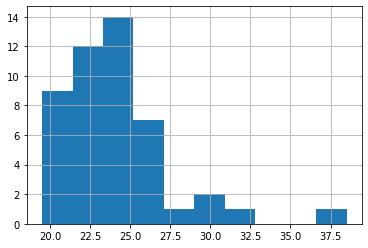

In [43]:
compact.avg_mileage.hist()

<AxesSubplot:>

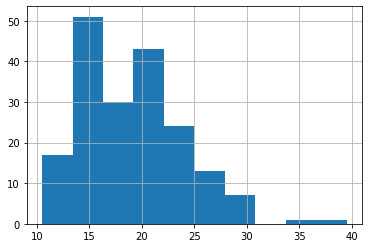

In [44]:
vehicle.avg_mileage.hist()

<AxesSubplot:>

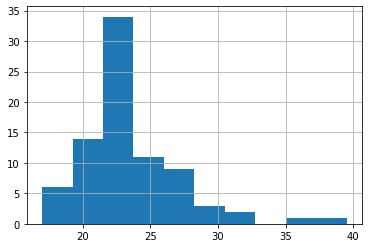

In [45]:
avgcar.avg_mileage.hist()

In [46]:
null_hypothesis = "No difference in fuel efficiency for the compact & average vehicle."
alternative_hypothesis = "Compact cars are more fuel efficienct then average vehicles."
confidence_level = .95
a = 1 - confidence_level 

In [47]:
t, p = stats.ttest_ind(compact.avg_mileage, vehicle.avg_mileage)
t, p

(6.731177612837954, 1.3059121585018135e-10)

In [48]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference in compact & average vehicle fuel efficiency.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We reject the null hypothesis that there is not a difference in compact & average vehicle fuel efficiency.


# Now test all cars EXCEPT compact:

In [50]:
null_hypothesis = "No difference in fuel efficiency for the compact & average car."
alternative_hypothesis = "Compact cars are more fuel efficienct then average cars."
confidence_level = .95
a = 1 - confidence_level 

In [51]:
t, p = stats.ttest_ind(compact.avg_mileage, avgcar.avg_mileage)
t, p

(1.2628643800649562, 0.2089699909230701)

In [52]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference in compact & average car fuel efficiency.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We fail to reject the null hypothesis
We don't have enough evidence to support the claim that Compact cars are more fuel efficienct then average cars.


## Do manual cars get better gas mileage than automatic cars?

In [53]:
mpg['transcategory'] = np.where(mpg.trans.str.startswith('auto'), 'auto', 'manual')
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,type,avg_mileage,is_car,transcategory
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,1,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,1,manual


In [54]:
autov = mpg[mpg.transcategory == "auto"]
manualv = mpg[mpg.transcategory == "manual"]

autoc = mpg[(mpg.transcategory == "auto") & (mpg.is_car == 1)]
manualc = mpg[(mpg.transcategory == "manual") & (mpg.is_car == 1)]

<AxesSubplot:>

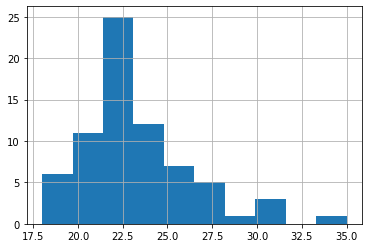

In [55]:
autoc.avg_mileage.hist()

<AxesSubplot:>

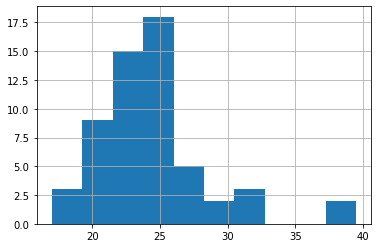

In [56]:
manualc.avg_mileage.hist()

In [60]:
null_hypothesis = "No difference in fuel efficiency for the automatic cars & manual cars."
alternative_hypothesis = "Manual cars are more fuel efficient then automatic cars."
confidence_level = .95
a = 1 - confidence_level 

In [61]:
t, p = stats.ttest_ind(manualc.avg_mileage, autoc.avg_mileage)
t, p

(1.4826584633865647, 0.1406620452586435)

In [62]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference in manual & automatic car fuel efficiency.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We fail to reject the null hypothesis
We don't have enough evidence to support the claim that Manual cars are more fuel efficient then automatic cars.


# Now test manual vs auto VEHICLES.

<AxesSubplot:>

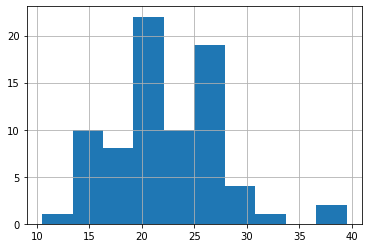

In [63]:
manualv.avg_mileage.hist()

<AxesSubplot:>

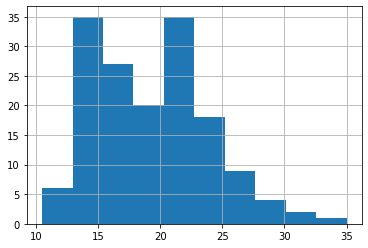

In [64]:
autov.avg_mileage.hist()

In [65]:
null_hypothesis = "No difference in fuel efficiency for the automatic vehicles & manual vehicles."
alternative_hypothesis = "Manual vehicles are more fuel efficient then automatic vehicles."
confidence_level = .95
a = 1 - confidence_level 

In [66]:
t, p = stats.ttest_ind(manualv.avg_mileage, autov.avg_mileage)
t, p

(4.593437735750014, 7.154374401145683e-06)

In [67]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference in manual & automatic vehicle fuel efficiency.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We reject the null hypothesis that there is not a difference in manual & automatic vehicle fuel efficiency.


# BONUS
## Q1. Load “Cust_Churn_Telco.csv” data. Using this data answer the following questions:

In [69]:
telco = pd.read_csv("Cust_Churn_Telco.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers?

In [71]:
curr_cust = telco[telco.Churn == "No"]
churned_cust = telco[telco.Churn == "Yes"]

<AxesSubplot:>

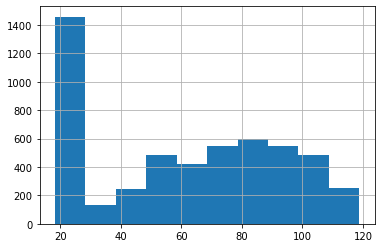

In [72]:
curr_cust.MonthlyCharges.hist()

<AxesSubplot:>

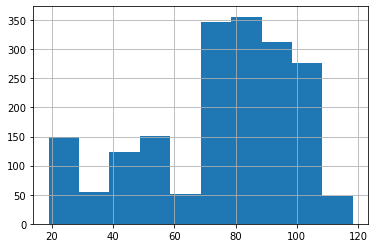

In [73]:
churned_cust.MonthlyCharges.hist()

<AxesSubplot:>

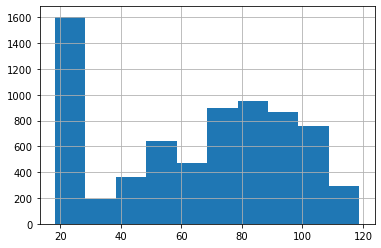

In [80]:
telco.MonthlyCharges.hist()

In [ ]:
null_hypothesis = "No difference between churned customers' monthly charges and monthly charges across all customers."
alternative_hypothesis = "Churned customers' monthly charges were higher than monthly charges across all customers."
confidence_level = .95
a = 1 - confidence_level 

In [74]:
t, p = stats.ttest_ind(churned_cust.MonthlyCharges, telco.MonthlyCharges)
t, p

(12.811618012755936, 3.0059436290936687e-37)

In [75]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference between churned customers' monthly charges and monthly charges across all customers.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We reject the null hypothesis that there is not a difference between churned customers' monthly charges and monthly charges across all customers.


### Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn?

In [76]:
null_hypothesis = "No difference between churned customers' monthly charges and current customers."
alternative_hypothesis = "Churned customers' monthly charges were higher than monthly charges across all customers'."
confidence_level = .95
a = 1 - confidence_level 

In [77]:
t, p = stats.ttest_ind(churned_cust.MonthlyCharges, curr_cust.MonthlyCharges)
t, p

(16.53673801593631, 2.706645606888261e-60)

In [78]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is not a difference between churned customers' monthly charges and current customers'.")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alternative_hypothesis)

We reject the null hypothesis that there is not a difference between churned customers' monthly charges and current customers'.


# Q2. Load Iris dataset from pydataset or sns. Using this data answer the following questions:

In [83]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


- Is the sepal length significantly different between Veriscolor and Virginica?

- Is the sepal length significantly different between Setosa and Virginica?

# CORRELATION EXERCISES

# 1. Use the `telco_churn` data. 
### 1a. Does tenure correlate with monthly charges? 

In [155]:
null_hypothesis = "No correlation between customers' tenure and monthly charges."
alternative_hypothesis = "There IS a correlation between customers' tenure and monthly charges."
confidence_level = .95
a = 1 - confidence_level 

In [101]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
x = telco.tenure
y = telco.MonthlyCharges

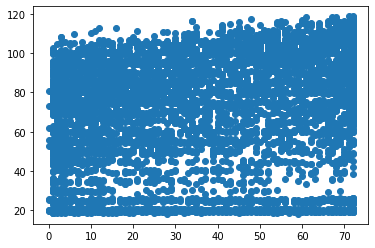

In [104]:
plt.scatter(x, y)

In [103]:
corr, p = stats.pearsonr(x,y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

In [105]:
print(f"No, there is not a strong correlation between Tenure & Monthly Charges, the correlation is a weak {round(corr, 2)}")

No, there is not a strong correlation between Tenure & Monthly Charges, the correltion is a weak 0.25


In [156]:
corr, p = stats.pearsonr(x,y)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between customers' tenure and monthly charges.
There is a linear relationship.


(0.2478998562861525, 4.094044991483017e-99)

### 1b. Total charges? 

In [112]:
totalcharges = telco.TotalCharges.dropna()

In [130]:
totalcharges.count()

7032

In [121]:
est_tenure = telco.tenure != 0

In [125]:
est_tenure.count()

7043

In [143]:
telco = telco.dropna()
telco.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
totalchg            7032
est_acct_age        7032
dtype: int64

In [145]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
totalchg            0
est_acct_age        0
dtype: int64

In [146]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,totalchg,est_acct_age
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,True
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50,True
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75,True
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,True


In [157]:
null_hypothesis = "No correlation between customers' tenure and total charges."
alternative_hypothesis = "There IS a correlation between customers' tenure and total charges."
confidence_level = .95
a = 1 - confidence_level 

In [150]:
x1 = telco.tenure
y1 = telco.TotalCharges

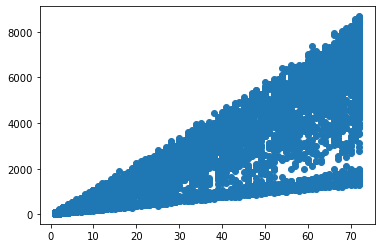

In [154]:
plt.scatter(x1, y1)

In [152]:
corr, p = stats.pearsonr(x1, y1)
corr, p

(0.8258804609332093, 0.0)

In [153]:
print(f"Yes, there is a positive correlation of {round(corr, 2)} between tenure and total charges.")

Yes, there is a positive correlation of 0.83 between tenure and total charges.


In [159]:
corr, p = stats.pearsonr(x1,y1)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between customers' tenure and total charges.
There is a linear relationship.


(0.8258804609332093, 0.0)

### 1c. What happens if you control for phone and internet service?

In [161]:
ph_int = telco[(telco.PhoneService == "Yes") & (telco.InternetService != "No")]
ph_int.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,totalchg,est_acct_age
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50,True
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,True
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,True
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,820.50,True
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1949.40,True


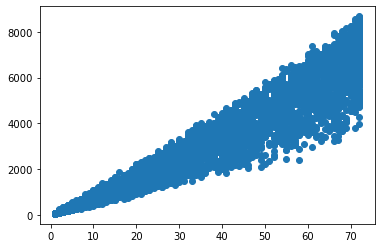

In [217]:
plt.scatter(ph_int.tenure, ph_int.TotalCharges)

In [162]:
null_hypothesis = "No correlation between phone & internet customers' tenure and total charges."
alternative_hypothesis = "There IS a correlation between phone & internet customers' tenure and total charges."
confidence_level = .95
a = 1 - confidence_level 

In [170]:
corr, p = stats.pearsonr(ph_int.tenure, ph_int.TotalCharges)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between employees' tenure and salary.
There is a linear relationship.


(0.957922977802917, 0.0)

In [172]:
print(f"Yes, there is a strong correlation of {round(corr, 2)} between phone & internet customers and total charges.")

Yes, there is a strong correlation of 0.96 between phone & internet customers and total charges.


# 2. Use the `employees` database.
### 2a. Is there a relationship between how long an employee has been with the company and their salary?

In [165]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [168]:
query = """
SELECT	first_name, 
		last_name, 
		hire_date, 
		salary, 
		DATEDIFF(NOW(), hire_date) AS "tenure"
FROM salaries AS s
    JOIN employees AS emps
        ON emps.emp_no = s.emp_no
WHERE s.to_date > NOW();

"""


curremp = pd.read_sql(query, url)
curremp.head()

,first_name,last_name,hire_date,salary,tenure
0,Georgi,Facello,1986-06-26,88958,12650
1,Bezalel,Simmel,1985-11-21,72527,12867
2,Parto,Bamford,1986-08-28,43311,12587
3,Chirstian,Koblick,1986-12-01,74057,12492
4,Kyoichi,Maliniak,1989-09-12,94692,11476


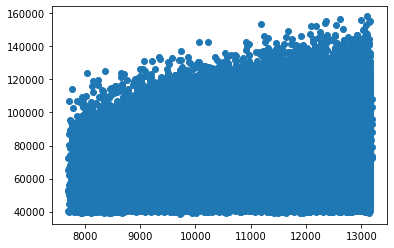

In [216]:
plt.scatter(curremp.tenure, curremp.salary)

In [169]:
null_hypothesis = "No correlation between employees' tenure and salary."
alternative_hypothesis = "There IS a correlation between employees' tenure and salary."
confidence_level = .95
a = 1 - confidence_level 

In [173]:
corr, p = stats.pearsonr(curremp.tenure, curremp.salary)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between employees' tenure and salary.
There is a linear relationship.


(0.30646256131860894, 0.0)

In [175]:
print(f"No, there is NOT a positive correlation, but a weak correlation of {round(corr, 2)} between tenure and salary.")

No, there is NOT a positive correlation, but a weak correlation of 0.31 between tenure and salary.


### 2b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [210]:
query1 = """
SELECT first_name,
		last_name,
		COUNT(title) AS num_titles,
		DATEDIFF(NOW(), hire_date) AS tenure
FROM titles AS t
    JOIN employees AS emps
    	using(emp_no)
GROUP BY t.emp_no;
"""

temps = pd.read_sql(query1, url)
temps.head()

,first_name,last_name,num_titles,tenure
0,Georgi,Facello,1,12650
1,Bezalel,Simmel,1,12867
2,Parto,Bamford,1,12587
3,Chirstian,Koblick,2,12492
4,Kyoichi,Maliniak,2,11476


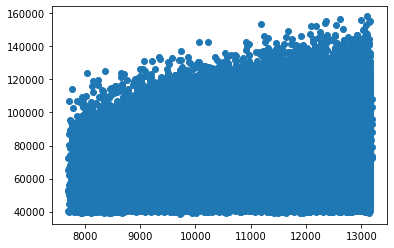

In [211]:
plt.scatter(curremp.tenure, curremp.salary)

In [212]:
null_hypothesis = "No correlation between employees' tenure and number of titles held."
alternative_hypothesis = "There IS a correlation between employees' tenure and number of titles held."
confidence_level = .95
a = 1 - confidence_level 

In [213]:
corr, p = stats.pearsonr(curremp.tenure, curremp.salary)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between employees' tenure and number of titles held.
There is a linear relationship.


(0.30646256131860894, 0.0)

In [215]:
print(f"No, there is NOT a strong, but a weak correlation of {round(corr, 2)} between tenure and number of titles held.")

No, there is NOT a strong, but a weak correlation of 0.31 between tenure and number of titles held.


# 3. Use the `sleepstudy` data. 
### Is there a relationship between days and reaction time?

In [178]:
sleep = data('sleepstudy')
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [179]:
x3 = sleep.Days
y3 = sleep.Reaction

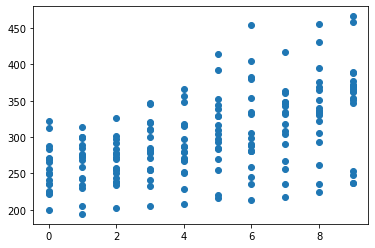

In [182]:
plt.scatter(x3, y3)

In [180]:
null_hypothesis = "No correlation between days without sleep and reaction time."
alternative_hypothesis = "There IS a correlation between days without sleep and reaction time."
confidence_level = .95
a = 1 - confidence_level 

In [181]:
corr, p = stats.pearsonr(x3,y3)
if p < a:
    print(f"Reject null statment: {null_hypothesis}")
    print("There is a linear relationship.")
else: 
    print("Fail to reject the null hypothesis.")
corr, p

Reject null statment: No correlation between days without sleep and reaction time.
There is a linear relationship.


(0.5352302262650253, 9.894096322214812e-15)

In [184]:
print(f"There is not a strong, but a weak correlation of {round(corr, 2)} between days without sleep and reaction time.")

There is not a strong, but a weak correlation of 0.54 between days without sleep and reaction time.


# $ {CHI} ^2$ EXERCISES
# 1. Use the following contingency table to help answer the question:
of whether using a macbook and being a codeup student are independent of each other.

In [185]:
index = ['Uses a Macbook', 'Doesn''t Use a Macbook']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index = index, columns = columns)
n = observed.values.sum()

observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesnt Use a Macbook,1,30


In [187]:
null_hypothesis = "There is no relationship between Macbook useage and Codeup student status."
alternative_hypothesis = "There IS a relationship between Macbook useage and Codeup student status."
confidence_level = .99
a = 1 - confidence_level 

In [188]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p

We reject the null hypothesis: There is no relationship between Macbook useage and Codeup student status.
Therefore: There IS a relationship between Macbook useage and Codeup student status.


1.4116760526193828e-09

# 2. Choose another 2 categorical variables from the `mpg` dataset and perform: 
a $ {chi} ^2$ contingency table test with them.
- Be sure to state your null and alternative hypothesis.

In [189]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,type,avg_mileage,is_car,transcategory
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,1,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,1,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,1,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,1,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,1,auto


In [191]:
observed2 = pd.crosstab(mpg.transcategory, mpg.type)
observed2

type,2seater,compact,midsize,minivan,pickup,subcompact,suv
transcategory,,,,,,,
auto,2,24,29,11,20,16,55
manual,3,23,12,0,13,19,7


In [203]:
null_hypothesis = "Transmission type and vehicle type are INDEPENDENT."
alternative_hypothesis = "There is a relationship between transmission type and vehicle type."
confidence_level = .99
a = 1 - confidence_level 

In [204]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p

We reject the null hypothesis: Transmission type and vehicle type are INDEPENDENT.
Therefore: There is a relationship between transmission type and vehicle type.


7.4513729838250925e-06

# 3. Use the data from the `employees` database to answer these questions:

In [197]:
query3 = """
select gender, dept_name
from employees AS e
	join dept_emp AS de
		using (emp_no)
	join departments AS d
		using (dept_no)
where de.to_date > NOW()
and dept_name = "Sales"
or dept_name = "Marketing";
"""


emp_d_de = pd.read_sql(query3, url)
emp_d_de.head()

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,M,Marketing
3,M,Marketing
4,F,Marketing


## 3a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [200]:
null_hypothesis = "Employee gender and whether they work in sales/marketing are INDEPENDENT."
alternative_hypothesis = "There is a relationship between employee gender and whether they work in sales/marketing."
confidence_level = .99
a = 1 - confidence_level 

In [201]:
observed3 = pd.crosstab(emp_d_de.gender, emp_d_de.dept_name)
observed3

dept_name,Marketing,Sales
gender,,
F,8037,14999
M,12174,22702


In [202]:
chi2, p, degf, expected = stats.chi2_contingency(observed3)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p

We fail to reject the null, therefore: Employee gender and whether they work in sales/marketing are INDEPENDENT.


0.9723000856728293

## 3b. Is an employee's gender independent of whether or not they are or have been a manager?

In [206]:
query4 = """
select gender, title
from employees AS e
	join dept_manager AS dm
		using (emp_no)
	join titles AS t
			using (emp_no)
where title = "Manager";
"""


emp_dm_de = pd.read_sql(query4, url)
emp_dm_de.head()

,gender,title
0,M,Manager
1,M,Manager
2,M,Manager
3,F,Manager
4,F,Manager


In [207]:
null_hypothesis = "Employee gender and whether they are(have been) a manager are INDEPENDENT."
alternative_hypothesis = "There is a relationship between employee gender and whether they are(have been) a manager."
confidence_level = .99
a = 1 - confidence_level 

In [208]:
observed4 = pd.crosstab(emp_dm_de.gender, emp_dm_de.title)
observed4

title,Manager
gender,
F,13
M,11


In [209]:
chi2, p, degf, expected = stats.chi2_contingency(observed4)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p

We fail to reject the null, therefore: Employee gender and whether they are(have been) a manager are INDEPENDENT.


1.0